In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/superstore_sample.csv")

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Create column named "sale_pre_discount"

In [ ]:
df["sale_pre_discount"] = df["Sales"] / (1 - df["Discount"])

In [ ]:
df["sale_pre_discount"]

0        261.96
1        731.94
2         14.62
3       1741.05
4         27.96
         ...   
9989      31.56
9990      91.96
9991     323.22
9992      29.60
9993     243.16
Name: sale_pre_discount, Length: 9994, dtype: float64

Create column named "discount_value"

In [ ]:
df["discount_value"] = df["sale_pre_discount"] * df["Discount"]

In [ ]:
df["discount_value"]

0         0.0000
1         0.0000
2         0.0000
3       783.4725
4         5.5920
          ...   
9989      6.3120
9990      0.0000
9991     64.6440
9992      0.0000
9993      0.0000
Name: discount_value, Length: 9994, dtype: float64

Print 5 rows of data with the largest discount_value

In [ ]:
df.sort_values('discount_value', ascending=False).head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,sale_pre_discount,discount_value
2697,2698,CA-2014-145317,3/18/2014,3/23/2014,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784,45276.96,22638.480
7772,7773,CA-2016-108196,11/25/2016,12/2/2016,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780,14999.95,10499.965
9774,9775,CA-2014-169019,7/26/2014,7/30/2014,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,...,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928,10887.92,8710.336
683,684,US-2017-168116,11/4/2017,11/4/2017,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,...,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904,15999.96,7999.980
4991,4992,US-2017-122714,12/7/2017,12/13/2017,Standard Class,HG-14965,Henry Goldwyn,Corporate,United States,Chicago,...,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845,9449.95,7559.960


Create histogram showing the distribution of Discount

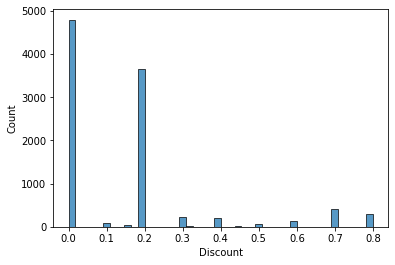

In [ ]:
sns.histplot(df["Discount"])

Create a histogram showing the distribution of Discount using rows where a loss was made

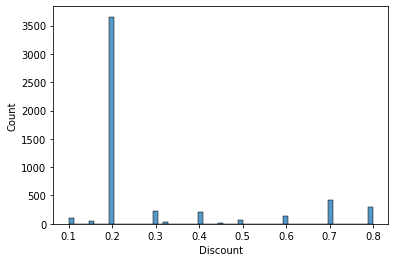

In [ ]:
sns.histplot(df["Discount"].loc[df["Discount"] != 0])

Create pie chart showing how frequently the different regions of the US are seen

In [ ]:
df["Region"].describe()

count     9994
unique       4
top       West
freq      3203
Name: Region, dtype: object

In [ ]:
num_of_unique_region = df["Region"].describe()["unique"]
print(num_of_unique_region)

4


In [ ]:
df.groupby("Region").count()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,sale_pre_discount,discount_value
Region,,,,,,,,,,,,,,,,,,,,,
Central,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,...,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323
East,2848,2848,2848,2848,2848,2848,2848,2848,2848,2848,...,2848,2848,2848,2848,2848,2848,2848,2848,2848,2848
South,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620,...,1620,1620,1620,1620,1620,1620,1620,1620,1620,1620
West,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,...,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203


In [ ]:
df["Region"].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [ ]:
values_count = df["Region"].value_counts().values
labels = df["Region"].value_counts().index

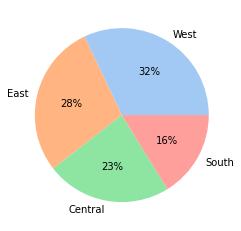

In [ ]:
colors = sns.color_palette('pastel')[0:num_of_unique_region]

#create pie chart
plt.pie(values_count, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Report the total profit from each Region. Create pie chart showing the percentage of total profit that came from each region

In [ ]:
group_profit_by_region = df.groupby(by=['Region'], as_index=False)['Profit'].sum()


In [ ]:
region = group_profit_by_region.Region
profit = group_profit_by_region.Profit

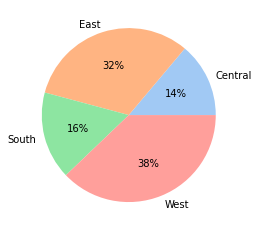

In [ ]:
colors = sns.color_palette('pastel')[0:num_of_unique_region]

#create pie chart
plt.pie(profit, labels = region, colors = colors, autopct='%.0f%%')
plt.show()

- For each customer, calculate total profit + sales they have created for the company
- Create histogram showing distribution of profit + sales per customer

In [ ]:
group_profit_by_customer = df.groupby(by=['Customer ID'], as_index=False)['Profit'].sum()
group_sales_by_customer = df.groupby(by=['Customer ID'], as_index=False)['Sales'].sum()


In [ ]:
group_profit_by_customer

,Customer ID,Profit
0,AA-10315,-362.8825
1,AA-10375,277.3824
2,AA-10480,435.8274
3,AA-10645,857.8033
4,AB-10015,129.3465
...,...,...
788,XP-21865,621.2300
789,YC-21895,1305.6290
790,YS-21880,1778.2923
791,ZC-21910,-1032.1490


In [ ]:
group_sales_by_customer

,Customer ID,Sales
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5086.935
4,AB-10015,886.156
...,...,...
788,XP-21865,2374.658
789,YC-21895,5454.350
790,YS-21880,6720.444
791,ZC-21910,8025.707


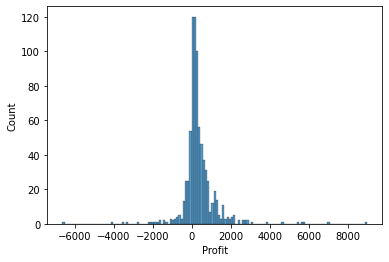

In [ ]:
sns.histplot(group_profit_by_customer.Profit)

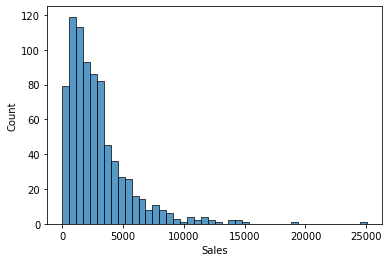

In [ ]:
sns.histplot(group_sales_by_customer.Sales)

- customer who has generated the highest total profit 
- customer who has generated the largest total loss

In [ ]:
group_profit_by_customer.sort_values('Profit', ascending=False).head(5)

,Customer ID,Profit
741,TC-20980,8981.3239
621,RB-19360,6976.0959
669,SC-20095,5757.4119
327,HL-15040,5622.4292
6,AB-10105,5444.8055


In [ ]:
group_profit_by_customer.sort_values('Profit', ascending=True).head(5)

,Customer ID,Profit
180,CS-12505,-6626.3895
310,GT-14635,-4108.6589
459,LF-17185,-3583.9770
711,SR-20425,-3333.9144
322,HG-14965,-2797.9635


In [ ]:
customer_largest_profit = df[df["Customer ID"] == 'TC-20980']
customer_largest_loss = df[df["Customer ID"] == 'CS-12505']

For customer with the lartest profit:
+ type of customer
+ number of items purchased
+ average dollar value of their discounts
+ total profit

In [ ]:
customer_largest_profit["Profit"]

2072       2.5592
3185     -44.2782
3186      26.9526
6825       4.8720
6826    8399.9760
6827     331.1910
6828      16.8413
6829       9.5088
8060      28.8580
8061       8.8624
8337      11.7208
8338     184.2600
Name: Profit, dtype: float64

In [ ]:
customer_largest_profit["Segment"]

2072    Corporate
3185    Corporate
3186    Corporate
6825    Corporate
6826    Corporate
6827    Corporate
6828    Corporate
6829    Corporate
8060    Corporate
8061    Corporate
8337    Corporate
8338    Corporate
Name: Segment, dtype: object

In [ ]:
print("Number of items buy " , customer_largest_profit["Quantity"].sum())

Number of items buy  42


In [ ]:
print("Avg dollars of discount ", customer_largest_profit["discount_value"].mean())

Avg dollars of discount  10.892666666666669


In [ ]:
print("Total profit they made ", customer_largest_profit["Profit"].sum())

Total profit they made  8981.323900000001


In [ ]:
customer_largest_loss

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,sale_pre_discount,discount_value
1477,1478,CA-2016-121958,11/13/2016,11/17/2016,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Thomasville,...,OFF-SU-10000381,Office Supplies,Supplies,Acme Forged Steel Scissors with Black Enamel H...,52.136,7,0.2,5.8653,65.17,13.034
1507,1508,CA-2016-134208,9/17/2016,9/23/2016,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Columbus,...,TEC-MA-10004458,Technology,Machines,Lexmark X 9575 Professional All-in-One Color P...,396.000,4,0.0,190.0800,396.00,0.000
2803,2804,CA-2015-159380,5/12/2015,5/16/2015,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,San Francisco,...,OFF-PA-10003893,Office Supplies,Paper,Xerox 1962,12.840,3,0.0,5.7780,12.84,0.000
2804,2805,CA-2015-159380,5/12/2015,5/16/2015,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,San Francisco,...,OFF-PA-10004239,Office Supplies,Paper,Xerox 1953,25.680,6,0.0,11.5560,25.68,0.000
6822,6823,US-2017-115609,11/2/2017,11/7/2017,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Los Angeles,...,OFF-AP-10003040,Office Supplies,Appliances,Fellowes 8 Outlet Superior Workstation Surge P...,168.100,5,0.0,43.7060,168.10,0.000
7771,7772,CA-2016-108196,11/25/2016,12/2/2016,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,456.588,2,0.7,-304.3920,1521.96,1065.372
7772,7773,CA-2016-108196,11/25/2016,12/2/2016,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780,14999.95,10499.965
7773,7774,CA-2016-108196,11/25/2016,12/2/2016,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,TEC-AC-10000926,Technology,Accessories,NETGEAR RangeMax WNR1000 Wireless Router,59.976,3,0.2,11.9952,74.97,14.994
9659,9660,CA-2014-100860,3/26/2014,3/30/2014,Second Class,CS-12505,Cindy Stewart,Consumer,United States,Pomona,...,OFF-LA-10001982,Office Supplies,Labels,Smead Alpha-Z Color-Coded Name Labels First Le...,18.750,5,0.0,9.0000,18.75,0.000


For customer with the largest loss:
+ type of customer
+ number of items purchased
+ average dollar value of their discounts
+ total loss

In [ ]:
customer_largest_loss["Segment"]

1477    Consumer
1507    Consumer
2803    Consumer
2804    Consumer
6822    Consumer
7771    Consumer
7772    Consumer
7773    Consumer
9659    Consumer
Name: Segment, dtype: object

In [ ]:
print("Number of items buy " , customer_largest_loss["Quantity"].sum())

Number of items buy  40


In [ ]:
print("Avg dollars of discount ", customer_largest_loss["discount_value"].mean())

Avg dollars of discount  1288.1516666666662


In [ ]:
print("Total loss they made ", customer_largest_loss["Profit"].sum())

Total loss they made  -6626.389499999999


Produce a bar chart showing total profit for each year for the store

In [ ]:
df['order_date'] = pd.to_datetime(df['Order Date'])
df['order_date_year'], df['order_date_month'] = df['order_date'].dt.year, df['order_date'].dt.month

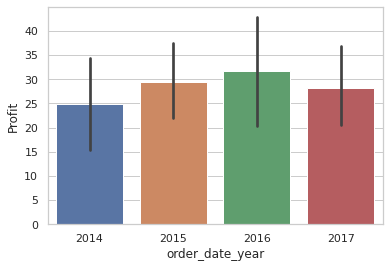

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="order_date_year", y="Profit", data=df)

Create a new column time_to_ship

In [ ]:
df['ship_date'] = pd.to_datetime(df['Ship Date'])
df['ship_date_year'] = df['ship_date'].dt.year

In [ ]:
df["time_to_ship"] = (df["ship_date"] - df["order_date"]).dt.days

Report the average, standard deviation ,minium, maximum of time_to_ship

In [ ]:
df["time_to_ship"].describe()

count    9994.000000
mean        3.958175
std         1.747567
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: time_to_ship, dtype: float64

Create box plot visualization showing the distribution of the time_to_ship. 
(Mình có đính kèm số liệu ở bảng dưới)

In [ ]:
df[["time_to_ship", "Region"]].groupby("Region").describe()

time_to_ship                                             
               count      mean       std  min  25%  50%  75%  max
Region                                                           
Central       2323.0  4.058115  1.688635  0.0  3.0  4.0  5.0  7.0
East          2848.0  3.908708  1.728728  0.0  3.0  4.0  5.0  7.0
South         1620.0  3.958025  1.737418  0.0  3.0  4.0  5.0  7.0
West          3203.0  3.929753  1.808198  0.0  3.0  4.0  5.0  7.0

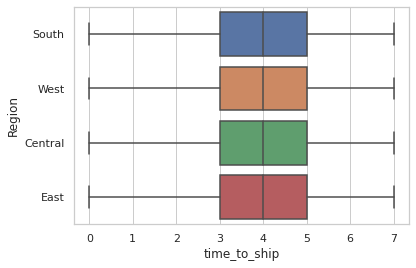

In [ ]:
sns.set_theme(style="whitegrid")
ax1 = sns.boxplot(x=df["time_to_ship"], y=df["Region"])

**CÂU 5**

In [ ]:
#df["first_name"] = df["Customer Name"].apply(lambda x: x.split()[0])
df['first_name'] = df['Customer Name'].loc[df['Customer Name'].str.split().str.len() > 0].str.split(expand=True)[0]

In [ ]:
df.first_name

0       Claire
1       Claire
2       Darrin
3         Sean
4         Sean
         ...  
9989       Tom
9990      Dave
9991      Dave
9992      Dave
9993     Chris
Name: first_name, Length: 9994, dtype: object

In [ ]:
df["first_name"].value_counts()

Michael     120
Frank       112
John        107
Patrick      96
Brian        93
           ... 
Patricia      2
Stefanie      2
Anemone       2
Jocasta       1
Lela          1
Name: first_name, Length: 335, dtype: int64

The most common first name is Michael (frequency 120)

In [ ]:
df["name_length"] = df["Customer Name"].str.len()

In [ ]:
df[["Customer Name", "name_length"]].drop_duplicates().sort_values('name_length', ascending=False).head(10)

,Customer Name,name_length
2382,Christina VanderZanden,22
1330,Alejandro Ballentine,20
506,Christopher Martinez,20
1117,Christine Sundaresam,20
933,Catherine Glotzbach,19
1610,Marina Lichtenstein,19
2614,Aleksandra Gannaway,19
897,Maribeth Schnelling,19
599,Chloris Kastensmidt,19
1894,Adam Shillingsburg,18


The longest full name is Christina VanderZanden (22 characters)

Column order_date is the date of customer's purchase

In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,discount_value,order_date,order_date_year,order_date_month,ship_date,ship_date_year,time_to_ship,first_name,last_name,name_length
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0.0000,2016-11-08,2016,11,2016-11-11,2016,3,Claire,Gute,11
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0.0000,2016-11-08,2016,11,2016-11-11,2016,3,Claire,Gute,11
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,0.0000,2016-06-12,2016,6,2016-06-16,2016,4,NaN,NaN,15
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,783.4725,2015-10-11,2015,10,2015-10-18,2015,7,Sean,O'Donnell,14
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,5.5920,2015-10-11,2015,10,2015-10-18,2015,7,Sean,O'Donnell,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,6.3120,2014-01-21,2014,1,2014-01-23,2014,2,Tom,Boeckenhauer,16
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,0.0000,2017-02-26,2017,2,2017-03-03,2017,5,Dave,Brooks,11
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,64.6440,2017-02-26,2017,2,2017-03-03,2017,5,Dave,Brooks,11
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,0.0000,2017-02-26,2017,2,2017-03-03,2017,5,Dave,Brooks,11


Create a line plot showing the number of new customers each month. (Ở đây mình lấy lược bớt những Customer ID bị trùng, chỉ lấy những row purchase đầu tiên. Sau cùng còn lại 793 rows, khớp với số lượng customer)

In [ ]:
df["order_month_year"] = df["order_date_month"].astype(str) + "/" + df["order_date_year"].astype(str)

In [ ]:
df_2 = df[["Customer ID", "Customer Name", "order_month_year", "order_date"]]

In [ ]:
df_2

,Customer ID,Customer Name,order_month_year,order_date
0,CG-12520,Claire Gute,11/2016,2016-11-08
1,CG-12520,Claire Gute,11/2016,2016-11-08
2,DV-13045,Darrin Van Huff,6/2016,2016-06-12
3,SO-20335,Sean O'Donnell,10/2015,2015-10-11
4,SO-20335,Sean O'Donnell,10/2015,2015-10-11
...,...,...,...,...
9989,TB-21400,Tom Boeckenhauer,1/2014,2014-01-21
9990,DB-13060,Dave Brooks,2/2017,2017-02-26
9991,DB-13060,Dave Brooks,2/2017,2017-02-26
9992,DB-13060,Dave Brooks,2/2017,2017-02-26


In [ ]:
df_3 = df_2.copy()

In [ ]:
df_3["combined"] = df_3["Customer ID"] + df_3["order_month_year"]

In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer ID       9994 non-null   object        
 1   Customer Name     9994 non-null   object        
 2   order_month_year  9994 non-null   object        
 3   order_date        9994 non-null   datetime64[ns]
 4   combined          9994 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 390.5+ KB


In [ ]:
df_3 = df_3.drop_duplicates(subset ="combined")

In [ ]:
df_3 = df_3.sort_values('order_date', ascending=True)

In [ ]:
df_3

,Customer ID,Customer Name,order_month_year,order_date,combined
7980,DP-13000,Darren Powers,1/2014,2014-01-03,DP-130001/2014
739,PO-19195,Phillina Ober,1/2014,2014-01-04,PO-191951/2014
1759,MB-18085,Mick Brown,1/2014,2014-01-05,MB-180851/2014
7180,JO-15145,Jack O'Briant,1/2014,2014-01-06,JO-151451/2014
7474,ME-17320,Maria Etezadi,1/2014,2014-01-06,ME-173201/2014
...,...,...,...,...,...
7632,KH-16360,Katherine Hughes,12/2017,2017-12-29,KH-1636012/2017
645,CC-12430,Chuck Clark,12/2017,2017-12-30,CC-1243012/2017
1296,EB-13975,Erica Bern,12/2017,2017-12-30,EB-1397512/2017
5091,JM-15580,Jill Matthias,12/2017,2017-12-30,JM-1558012/2017


In [ ]:
df_3 = df_3.drop_duplicates(subset ="Customer ID")

In [ ]:
df_3

,Customer ID,Customer Name,order_month_year,order_date,combined
7980,DP-13000,Darren Powers,1/2014,2014-01-03,DP-130001/2014
739,PO-19195,Phillina Ober,1/2014,2014-01-04,PO-191951/2014
1759,MB-18085,Mick Brown,1/2014,2014-01-05,MB-180851/2014
7180,JO-15145,Jack O'Briant,1/2014,2014-01-06,JO-151451/2014
7474,ME-17320,Maria Etezadi,1/2014,2014-01-06,ME-173201/2014
...,...,...,...,...,...
1620,JC-15385,Jenna Caffey,7/2017,2017-07-08,JC-153857/2017
6755,TC-21145,Theresa Coyne,9/2017,2017-09-15,TC-211459/2017
526,PH-18790,Patricia Hirasaki,10/2017,2017-10-21,PH-1879010/2017
1260,JR-15700,Jocasta Rupert,10/2017,2017-10-23,JR-1570010/2017


In [ ]:
df_4 = df_3[["Customer ID", "order_month_year"]].groupby("order_month_year").count()

In [ ]:
col1 = df_4.index.values

In [ ]:
col2 = df_4["Customer ID"].values

In [ ]:
d = {'col1': col1, 'col2': col2}
df_new = pd.DataFrame(data=d)

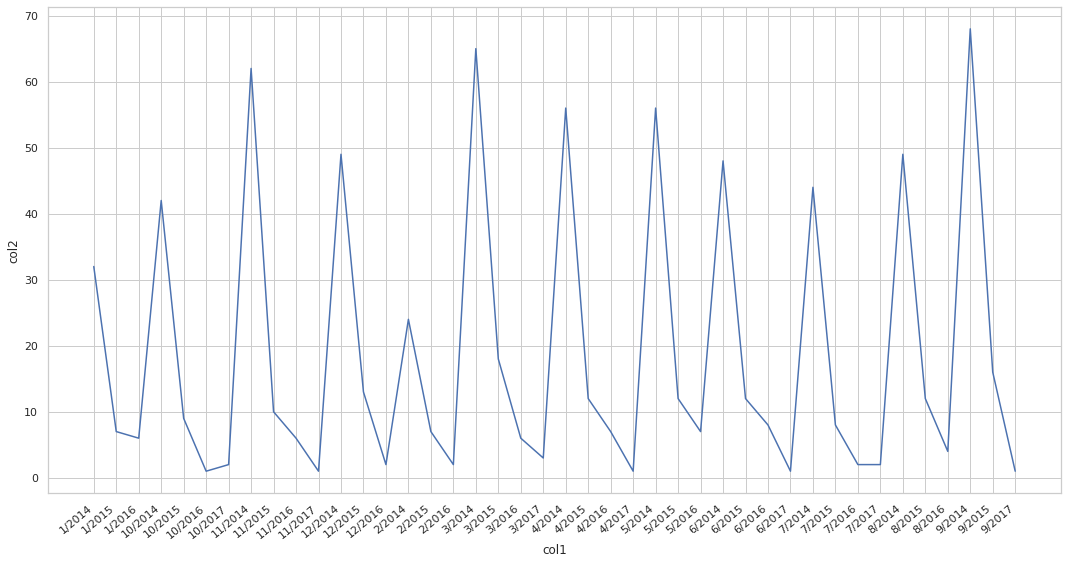

In [ ]:
plt.figure(figsize=(15,8))

ax = sns.lineplot(data=df_new, x="col1", y="col2")
ax.set_xticklabels(col1, rotation=40, ha="right")
plt.tight_layout()
plt.show()